In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(
    r"https://github.com/datasciencedojo/datasets/blob/master/titanic.csv?raw=true"
)

In [2]:
old_df = df.copy()

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
col = df.isnull().mean()[df.isnull().mean() * 100 > 5].index.values

In [5]:
# Using Pandas
df["Age"].fillna(df["Age"].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [6]:
from sklearn.impute import SimpleImputer

In [7]:
df["Age"].skew()

np.float64(0.38910778230082704)

In [8]:
si = SimpleImputer(strategy="mean")

In [9]:
df["Age"] = si.fit_transform(df["Age"].values.reshape(-1, 1))

In [10]:
# Outliers

<Axes: >

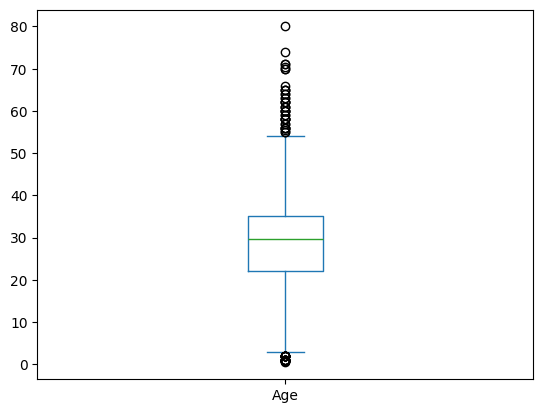

In [11]:
df["Age"].plot(kind="box")

<Axes: >

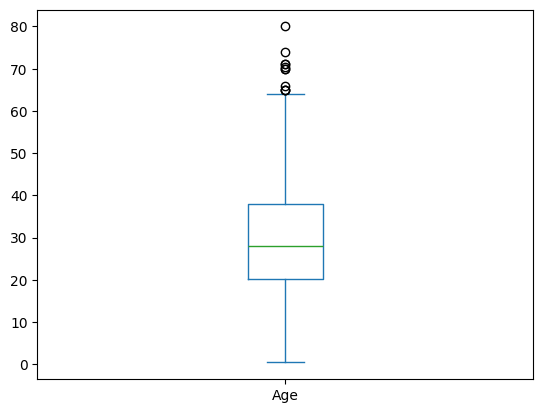

In [12]:
old_df["Age"].plot(kind="box")

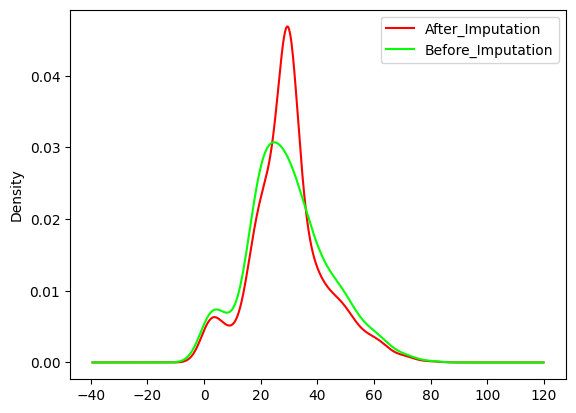

In [13]:
df["Age"].plot(kind="kde", label="After_Imputation", color="red")
old_df["Age"].plot(kind="kde", label="Before_Imputation", color="lime")
plt.legend()
plt.show()

In [14]:
# Statistical Measures

In [15]:
df["Age"].mean(), old_df["Age"].mean()

(np.float64(29.69911764705882), np.float64(29.69911764705882))

In [16]:
df["Age"].std(), old_df["Age"].std()

(np.float64(13.002015226002882), np.float64(14.526497332334042))

In [17]:
df["Age"].var(), old_df["Age"].var()

(np.float64(169.0523999372108), np.float64(211.01912474630802))

In [18]:
df["Age"].skew(), old_df["Age"].skew()

(np.float64(0.4344880940129925), np.float64(0.38910778230082704))

In [19]:
from scipy.stats import probplot

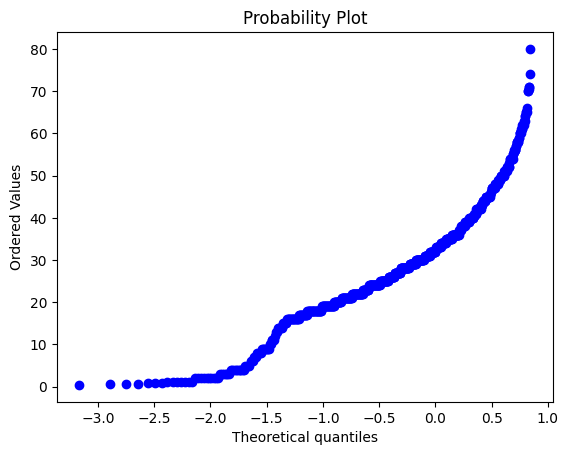

In [20]:
probplot(old_df["Age"], plot=plt)
plt.show()

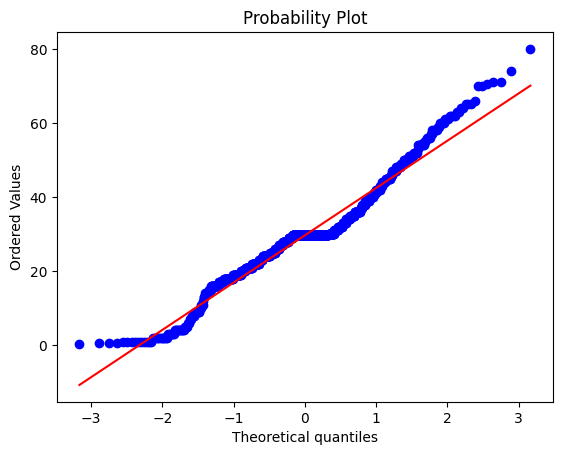

In [21]:
probplot(df["Age"], plot=plt)
plt.show()

In [22]:
# Not Worth it

In [23]:
si2 = SimpleImputer(strategy="median")

In [24]:
old_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
from sklearn.compose import ColumnTransformer

In [26]:
trf = [("mean", si, [5]), ("Median", si2, [5])]

In [27]:
transformation = ColumnTransformer(transformers=trf)

<Axes: >

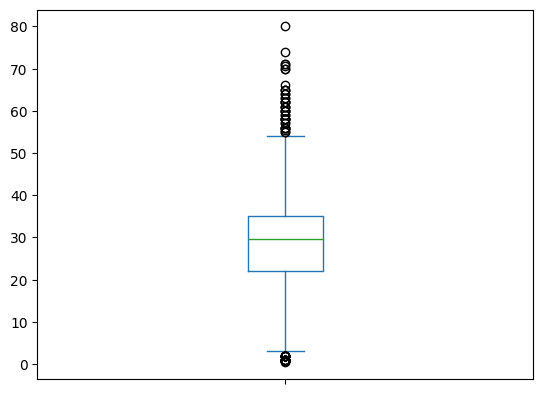

In [28]:
pd.Series(transformation.fit_transform(df)[:, 1]).plot(kind="box")

In [29]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [31]:
# Mixed Variable
df["Cabin"]

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [32]:
# Regex

In [33]:
import re

txt = "The rain in Spain"
x = re.search("^The.*Spain$", txt)

In [52]:
txt = "Hello World DD 37636"

In [55]:
re.findall("[a-dA-D]+", txt)

['d', 'DD']

In [87]:
sample = """What is Lorem Ipsum?
Lorem Ipsum is simply dummy text of the printing and typesetting industry. Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of type and scrambled it to make a type specimen book. It has survived not only five centuries, but also the leap into electronic typesetting, remaining essentially unchanged. It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages, and more recently with desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum.

Why do we use it?
It is a long established fact that a reader will be distracted by the readable content of a page when looking at its layout. The point of using Lorem Ipsum is that it has a more-or-less normal distribution of letters, as opposed to using 'Content here, content here', making it look like readable English. Many desktop publishing packages and web page editors now use Lorem Ipsum as their default model text, and a search for 'lorem ipsum' will uncover many web sites still in their infancy. Various versions have evolved over the years, sometimes by accident, sometimes on purpose (injected humour and the like).


Where does it come from?
Contrary to popular belief, Lorem Ipsum is not simply random text. It has roots in a piece of classical Latin literature from 45 BC, making it over 2000 years old. Richard McClintock, a Latin professor at Hampden-Sydney College in Virginia, looked up one of the more obscure Latin words, consectetur, from a Lorem Ipsum passage, and going through the cites of the word in classical literature, discovered the undoubtable source. Lorem Ipsum comes from sections 1.10.32 and 1.10.33 of "de Finibus Bonorum et Malorum" (The Extremes of Good and Evil) by Cicero, written in 45 BC. This book is a treatise on the theory of ethics, very popular during the Renaissance. The first line of Lorem Ipsum, "Lorem ipsum dolor sit amet..", comes from a line in section 1.10.32. Lossm"""

In [68]:
pattern = "[0-9]+"

In [69]:
re.findall(pattern, sample)

['1500',
 '1960',
 '45',
 '2000',
 '1',
 '10',
 '32',
 '1',
 '10',
 '33',
 '45',
 '1',
 '10',
 '32']

In [73]:
patt = '^Lo*$m'

'What is Lorem Ipsum?\nLorem Ipsum is simply dummy text of the printing and typesetting industry. Lorem Ipsum has been the industry\'s standard dummy text ever since the 1500s, when an unknown printer took a galley of type and scrambled it to make a type specimen book. It has survived not only five centuries, but also the leap into electronic typesetting, remaining essentially unchanged. It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages, and more recently with desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum.\n\nWhy do we use it?\nIt is a long established fact that a reader will be distracted by the readable content of a page when looking at its layout. The point of using Lorem Ipsum is that it has a more-or-less normal distribution of letters, as opposed to using \'Content here, content here\', making it look like readable English. Many desktop publishing packages and web page editors now use Lorem Ips

In [84]:
re.findall("^1.10.32.", sample)

[]

In [88]:
re.findall("Lo.{2}m", sample)

['Lorem',
 'Lorem',
 'Lorem',
 'Lorem',
 'Lorem',
 'Lorem',
 'Lorem',
 'Lorem',
 'Lorem',
 'Lorem',
 'Lorem',
 'Lorem',
 'Lossm']

In [89]:
re.findall("Lorem|Lossm", sample)

['Lorem',
 'Lorem',
 'Lorem',
 'Lorem',
 'Lorem',
 'Lorem',
 'Lorem',
 'Lorem',
 'Lorem',
 'Lorem',
 'Lorem',
 'Lorem',
 'Lossm']

In [90]:
re.findall("/\s*\([^)]*\)/', '", sample)

[]

In [103]:
df["Room"] = df["Cabin"].str.extract(r"([0-9]+)")

In [107]:
df["Cabin_number"] = df["Cabin"].str.extract(r"([A-Z]+)")

In [110]:
si3 = SimpleImputer(strategy="most_frequent")

In [114]:
df["Cabin_number"].mode()[0]

'C'

In [116]:
df[["Cabin_number"]] = si3.fit_transform(df[["Cabin_number"]])

In [118]:
old_df["Cabin_number"] = old_df["Cabin"].str.extract(r"([A-Z]+)")

In [121]:
(old_df["Cabin_number"].value_counts() / len(old_df)) * 100

Cabin_number
C    6.621773
B    5.274972
D    3.703704
E    3.591470
A    1.683502
F    1.459035
G    0.448934
T    0.112233
Name: count, dtype: float64

In [122]:
(df["Cabin_number"].value_counts() / len(df)) * 100

Cabin_number
C    83.726150
B     5.274972
D     3.703704
E     3.591470
A     1.683502
F     1.459035
G     0.448934
T     0.112233
Name: count, dtype: float64

In [123]:
# Mode imputation is not working good, need to find out other stargetgy.

In [127]:
si4 = SimpleImputer(strategy="constant", fill_value="Hello")

In [131]:
si4.fit_transform(df["Room"].values.reshape(-1, 1))

array([['Hello'],
       ['85'],
       ['Hello'],
       ['123'],
       ['Hello'],
       ['Hello'],
       ['46'],
       ['Hello'],
       ['Hello'],
       ['Hello'],
       ['6'],
       ['103'],
       ['Hello'],
       ['Hello'],
       ['Hello'],
       ['Hello'],
       ['Hello'],
       ['Hello'],
       ['Hello'],
       ['Hello'],
       ['Hello'],
       ['56'],
       ['Hello'],
       ['6'],
       ['Hello'],
       ['Hello'],
       ['Hello'],
       ['23'],
       ['Hello'],
       ['Hello'],
       ['Hello'],
       ['78'],
       ['Hello'],
       ['Hello'],
       ['Hello'],
       ['Hello'],
       ['Hello'],
       ['Hello'],
       ['Hello'],
       ['Hello'],
       ['Hello'],
       ['Hello'],
       ['Hello'],
       ['Hello'],
       ['Hello'],
       ['Hello'],
       ['Hello'],
       ['Hello'],
       ['Hello'],
       ['Hello'],
       ['Hello'],
       ['Hello'],
       ['33'],
       ['Hello'],
       ['30'],
       ['52'],
       ['Hello'],
       ['H